In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [308]:
df = pd.read_csv('제주특별자치도_해양환경 항만 측정 데이터_20221130.csv')

In [309]:
df

,측정 일자,정점명,위도,경도,날씨,수심,수층,투명도,수질평가지수(WQI)등급,수온,...,암모니아성질소,아질산성질소,질산성질소,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이
0,2013-02-15,성산포항 H01,33.470833,126.927500,맑음,4,표층,4.0,2,9.78,...,16.7,2.7,152.6,172.0,286.60,15.00,21.30,565.80,25.80,1.62
1,2013-02-15,성산포항 H01,33.470833,126.927500,맑음,4,저증,4.0,2,9.76,...,14.0,2.7,119.5,136.1,256.20,16.90,19.40,437.70,7.80,2.20
2,2013-02-15,제주항 H01,33.526111,126.540000,구름조금,12,표층,7.0,3,12.86,...,12.0,2.6,134.0,148.6,231.90,17.00,19.70,471.00,7.90,2.23
3,2013-02-15,제주항 H01,33.526111,126.540000,구름조금,12,저증,7.0,3,13.03,...,12.3,2.3,118.5,133.0,231.20,16.60,18.90,428.00,7.80,1.59
4,2013-02-15,제주항 H02,33.527222,126.530556,구름조금,15,표층,8.0,3,12.84,...,5.7,2.2,121.0,128.9,214.50,17.10,20.00,404.60,10.50,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-31,제주항 H02,33.527222,126.530556,맑음,12,저증,8.7,1,25.89,...,12.4,2.7,47.4,62.5,158.56,2.36,10.91,127.43,21.10,0.56
248,2021-08-31,한림항 H01,33.415556,126.255278,맑음,7,표층,3.0,3,24.57,...,8.6,4.5,159.1,172.2,243.75,1.15,15.75,96.49,32.95,0.67
249,2021-08-31,한림항 H01,33.415556,126.255278,맑음,7,저증,3.0,3,24.65,...,6.4,3.0,76.3,85.7,167.82,1.09,14.42,162.43,20.65,4.08
250,2021-08-31,한림항 H02,33.418056,126.259722,맑음,5,표층,2.0,4,26.92,...,27.6,4.7,431.8,464.1,1155.43,1.49,24.99,355.38,25.45,10.40


In [310]:
df.isnull().sum()

측정 일자            0
정점명              0
위도               0
경도               0
날씨               0
수심               0
수층               0
투명도              0
수질평가지수(WQI)등급    0
수온               0
염분               0
수소이온농도           0
용존산소량            0
화학적산소요구량         0
암모니아성질소          0
아질산성질소           0
질산성질소            0
용존무기질소           0
총질소              0
용존무기인            0
총인               0
규산규소             0
부유물질             0
클로로필에이           0
dtype: int64

In [311]:
df.columns

Index(['측정 일자', '정점명', '위도', '경도', '날씨', '수심', '수층', '투명도', '수질평가지수(WQI)등급',
       '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소',
       '용존무기질소', '총질소', '용존무기인', '총인', '규산규소', '부유물질', '클로로필에이'],
      dtype='object')

In [312]:
df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}')
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}')
#df = df.drop(['측정 일자'],axis = 1)

In [313]:
df

,측정 일자,정점명,위도,경도,날씨,수심,수층,투명도,수질평가지수(WQI)등급,수온,...,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이,년,월,일
0,2013-02-15,성산포항 H01,33.470833,126.927500,맑음,4,표층,4.0,2,9.78,...,172.0,286.60,15.00,21.30,565.80,25.80,1.62,2013,02,15
1,2013-02-15,성산포항 H01,33.470833,126.927500,맑음,4,저증,4.0,2,9.76,...,136.1,256.20,16.90,19.40,437.70,7.80,2.20,2013,02,15
2,2013-02-15,제주항 H01,33.526111,126.540000,구름조금,12,표층,7.0,3,12.86,...,148.6,231.90,17.00,19.70,471.00,7.90,2.23,2013,02,15
3,2013-02-15,제주항 H01,33.526111,126.540000,구름조금,12,저증,7.0,3,13.03,...,133.0,231.20,16.60,18.90,428.00,7.80,1.59,2013,02,15
4,2013-02-15,제주항 H02,33.527222,126.530556,구름조금,15,표층,8.0,3,12.84,...,128.9,214.50,17.10,20.00,404.60,10.50,3.58,2013,02,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-31,제주항 H02,33.527222,126.530556,맑음,12,저증,8.7,1,25.89,...,62.5,158.56,2.36,10.91,127.43,21.10,0.56,2021,08,31
248,2021-08-31,한림항 H01,33.415556,126.255278,맑음,7,표층,3.0,3,24.57,...,172.2,243.75,1.15,15.75,96.49,32.95,0.67,2021,08,31
249,2021-08-31,한림항 H01,33.415556,126.255278,맑음,7,저증,3.0,3,24.65,...,85.7,167.82,1.09,14.42,162.43,20.65,4.08,2021,08,31
250,2021-08-31,한림항 H02,33.418056,126.259722,맑음,5,표층,2.0,4,26.92,...,464.1,1155.43,1.49,24.99,355.38,25.45,10.40,2021,08,31


In [314]:
df.drop('날씨',axis = 1)

,측정 일자,정점명,위도,경도,수심,수층,투명도,수질평가지수(WQI)등급,수온,염분,...,용존무기질소,총질소,용존무기인,총인,규산규소,부유물질,클로로필에이,년,월,일
0,2013-02-15,성산포항 H01,33.470833,126.927500,4,표층,4.0,2,9.78,33.45,...,172.0,286.60,15.00,21.30,565.80,25.80,1.62,2013,02,15
1,2013-02-15,성산포항 H01,33.470833,126.927500,4,저증,4.0,2,9.76,33.45,...,136.1,256.20,16.90,19.40,437.70,7.80,2.20,2013,02,15
2,2013-02-15,제주항 H01,33.526111,126.540000,12,표층,7.0,3,12.86,33.59,...,148.6,231.90,17.00,19.70,471.00,7.90,2.23,2013,02,15
3,2013-02-15,제주항 H01,33.526111,126.540000,12,저증,7.0,3,13.03,33.75,...,133.0,231.20,16.60,18.90,428.00,7.80,1.59,2013,02,15
4,2013-02-15,제주항 H02,33.527222,126.530556,15,표층,8.0,3,12.84,33.71,...,128.9,214.50,17.10,20.00,404.60,10.50,3.58,2013,02,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-31,제주항 H02,33.527222,126.530556,12,저증,8.7,1,25.89,31.22,...,62.5,158.56,2.36,10.91,127.43,21.10,0.56,2021,08,31
248,2021-08-31,한림항 H01,33.415556,126.255278,7,표층,3.0,3,24.57,31.51,...,172.2,243.75,1.15,15.75,96.49,32.95,0.67,2021,08,31
249,2021-08-31,한림항 H01,33.415556,126.255278,7,저증,3.0,3,24.65,31.57,...,85.7,167.82,1.09,14.42,162.43,20.65,4.08,2021,08,31
250,2021-08-31,한림항 H02,33.418056,126.259722,5,표층,2.0,4,26.92,30.69,...,464.1,1155.43,1.49,24.99,355.38,25.45,10.40,2021,08,31


In [315]:
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)

In [316]:
# dummies = pd.get_dummies(df['정점명'], prefix='정점명').astype(int)

# df = df.drop('정점명', axis=1)

# df = pd.concat([df, dummies], axis=1)

# df

In [317]:
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

In [318]:
dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df

,측정 일자,정점명,위도,경도,수심,투명도,수질등급,수온,염분,수소이온농도,...,부유물질,클로로필에이,년,월,일,날씨_구름많음,날씨_구름조금,날씨_맑음,수층_저증,수층_표층
0,2013-02-15,성산포항 H01,33.470833,126.927500,4,4.0,2,9.78,33.45,8.27,...,25.80,1.62,2013,02,15,0,0,1,0,1
1,2013-02-15,성산포항 H01,33.470833,126.927500,4,4.0,2,9.76,33.45,8.26,...,7.80,2.20,2013,02,15,0,0,1,1,0
2,2013-02-15,제주항 H01,33.526111,126.540000,12,7.0,3,12.86,33.59,8.23,...,7.90,2.23,2013,02,15,0,1,0,0,1
3,2013-02-15,제주항 H01,33.526111,126.540000,12,7.0,3,13.03,33.75,8.27,...,7.80,1.59,2013,02,15,0,1,0,1,0
4,2013-02-15,제주항 H02,33.527222,126.530556,15,8.0,3,12.84,33.71,8.23,...,10.50,3.58,2013,02,15,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-31,제주항 H02,33.527222,126.530556,12,8.7,1,25.89,31.22,8.18,...,21.10,0.56,2021,08,31,0,0,1,1,0
248,2021-08-31,한림항 H01,33.415556,126.255278,7,3.0,3,24.57,31.51,8.36,...,32.95,0.67,2021,08,31,0,0,1,0,1
249,2021-08-31,한림항 H01,33.415556,126.255278,7,3.0,3,24.65,31.57,8.17,...,20.65,4.08,2021,08,31,0,0,1,1,0
250,2021-08-31,한림항 H02,33.418056,126.259722,5,2.0,4,26.92,30.69,8.30,...,25.45,10.40,2021,08,31,0,0,1,0,1


In [319]:
df

,측정 일자,정점명,위도,경도,수심,투명도,수질등급,수온,염분,수소이온농도,...,부유물질,클로로필에이,년,월,일,날씨_구름많음,날씨_구름조금,날씨_맑음,수층_저증,수층_표층
0,2013-02-15,성산포항 H01,33.470833,126.927500,4,4.0,2,9.78,33.45,8.27,...,25.80,1.62,2013,02,15,0,0,1,0,1
1,2013-02-15,성산포항 H01,33.470833,126.927500,4,4.0,2,9.76,33.45,8.26,...,7.80,2.20,2013,02,15,0,0,1,1,0
2,2013-02-15,제주항 H01,33.526111,126.540000,12,7.0,3,12.86,33.59,8.23,...,7.90,2.23,2013,02,15,0,1,0,0,1
3,2013-02-15,제주항 H01,33.526111,126.540000,12,7.0,3,13.03,33.75,8.27,...,7.80,1.59,2013,02,15,0,1,0,1,0
4,2013-02-15,제주항 H02,33.527222,126.530556,15,8.0,3,12.84,33.71,8.23,...,10.50,3.58,2013,02,15,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-08-31,제주항 H02,33.527222,126.530556,12,8.7,1,25.89,31.22,8.18,...,21.10,0.56,2021,08,31,0,0,1,1,0
248,2021-08-31,한림항 H01,33.415556,126.255278,7,3.0,3,24.57,31.51,8.36,...,32.95,0.67,2021,08,31,0,0,1,0,1
249,2021-08-31,한림항 H01,33.415556,126.255278,7,3.0,3,24.65,31.57,8.17,...,20.65,4.08,2021,08,31,0,0,1,1,0
250,2021-08-31,한림항 H02,33.418056,126.259722,5,2.0,4,26.92,30.69,8.30,...,25.45,10.40,2021,08,31,0,0,1,0,1


In [320]:
df.columns

Index(['측정 일자', '정점명', '위도', '경도', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도',
       '용존산소량', '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소',
       '용존무기인', '총인', '규산규소', '부유물질', '클로로필에이', '년', '월', '일', '날씨_구름많음',
       '날씨_구름조금', '날씨_맑음', '수층_저증', '수층_표층'],
      dtype='object')

In [321]:
df['정점명'].unique()

array(['성산포항 H01', '제주항 H01', '제주항 H02', '서귀포항 H01', '서귀포항 H02',
       '한림항 H01', '한림항 H02'], dtype=object)

## 정점명 별로 Dataframe 만들어서 각 항구에서의 항만데이터 분석

In [322]:
seongsan = df[df['정점명'] == '성산포항 H01'].drop(['정점명'],axis = 1)
jeju1 = df[df['정점명'] == '제주항 H01'].drop(['정점명'],axis = 1)
jeju2 = df[df['정점명'] == '제주항 H02'].drop(['정점명'],axis = 1)
seogwipo1 = df[df['정점명'] == '서귀포항 H01'].drop(['정점명'],axis = 1)
seogwipo2 = df[df['정점명'] == '서귀포항 H02'].drop(['정점명'],axis = 1)
hanlim1 = df[df['정점명'] == '한림항 H01'].drop(['정점명'],axis = 1)
hanlim2 = df[df['정점명'] == '한림항 H02'].drop(['정점명'],axis = 1)




In [323]:
seongsan

,측정 일자,위도,경도,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,...,부유물질,클로로필에이,년,월,일,날씨_구름많음,날씨_구름조금,날씨_맑음,수층_저증,수층_표층
0,2013-02-15,33.470833,126.9275,4,4.0,2,9.78,33.45,8.27,9.31,...,25.80,1.62,2013,02,15,0,0,1,0,1
1,2013-02-15,33.470833,126.9275,4,4.0,2,9.76,33.45,8.26,9.24,...,7.80,2.20,2013,02,15,0,0,1,1,0
26,2013-08-17,33.470833,126.9275,3,3.9,3,27.34,31.49,8.13,6.42,...,2.20,3.33,2013,08,17,0,0,1,0,1
27,2013-08-17,33.470833,126.9275,3,3.9,3,26.76,31.83,7.92,6.51,...,4.30,3.60,2013,08,17,0,0,1,1,0
28,2014-02-05,33.470833,126.9275,4,4.0,2,9.53,33.55,8.24,9.60,...,1.50,0.41,2014,02,05,0,1,0,0,1
29,2014-02-05,33.470833,126.9275,4,4.0,2,9.71,33.40,8.19,9.79,...,8.50,0.67,2014,02,05,0,1,0,1,0
46,2014-08-13,33.470833,126.9275,5,4.5,3,22.07,32.47,8.19,7.04,...,9.60,5.86,2014,08,13,0,1,0,0,1
47,2014-08-13,33.470833,126.9275,5,4.5,3,21.82,32.58,8.19,7.44,...,9.60,1.91,2014,08,13,0,1,0,1,0
56,2015-02-10,33.470833,126.9275,6,6.0,2,11.13,34.05,8.14,9.81,...,3.60,0.53,2015,02,10,0,0,1,0,1
57,2015-02-10,33.470833,126.9275,6,6.0,2,10.67,33.92,8.25,9.23,...,8.60,0.56,2015,02,10,0,0,1,1,0


In [324]:
seongsan = seongsan.drop(['위도','경도'],axis =1)

In [325]:
seongsan.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '년', '월', '일', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '수층_저증',
       '수층_표층'],
      dtype='object')

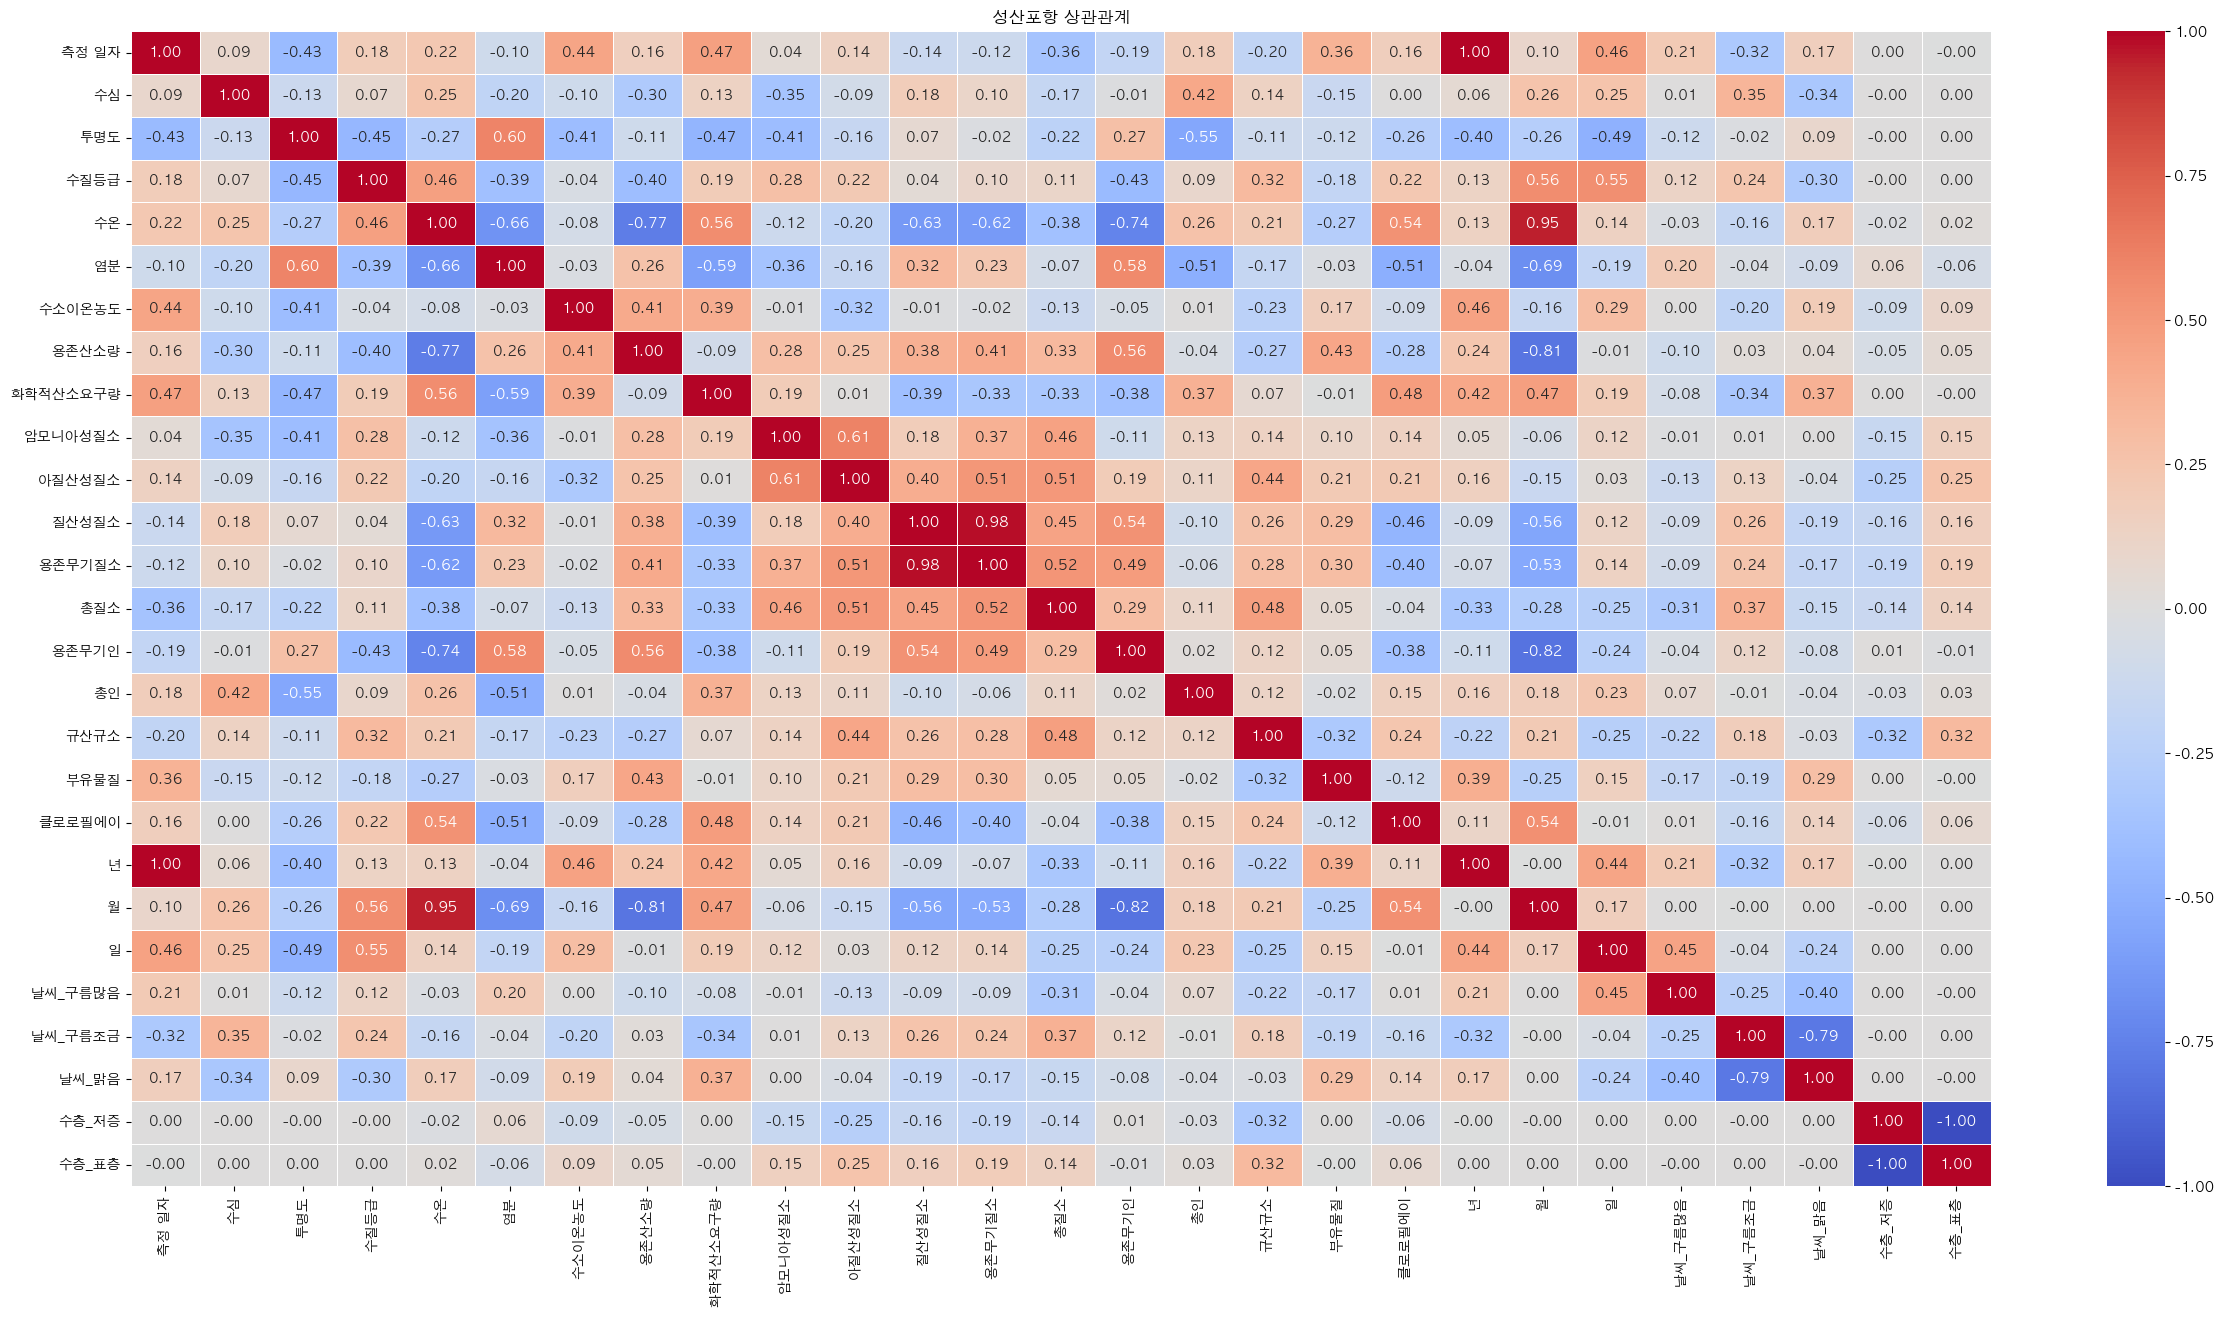

In [326]:
# Calculating the correlation between '최고기온', '최저기온', and '평균기온'
seongsancorr = seongsan.corr()

# Plotting the heatmap for these specific features
plt.figure(figsize=(30, 15))
sns.heatmap(seongsancorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('성산포항 상관관계')
plt.show()


/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/2410161384.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754

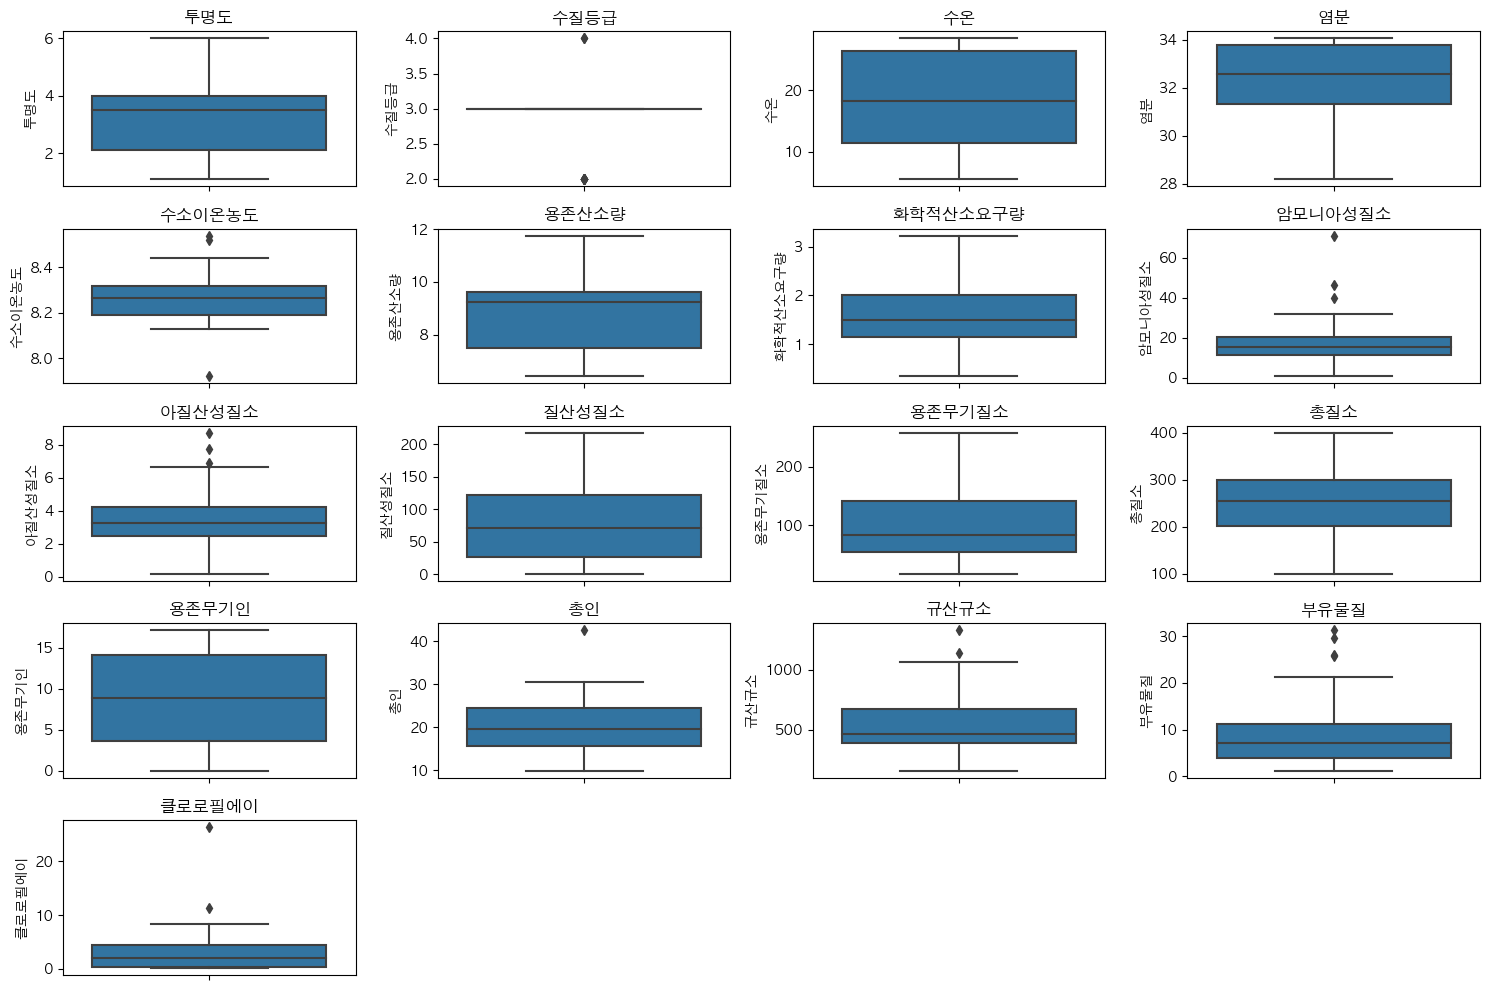

In [327]:
columns = [
    '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량',
    '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', 
    '용존무기인', '총인', '규산규소', '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/3879579778.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/38795

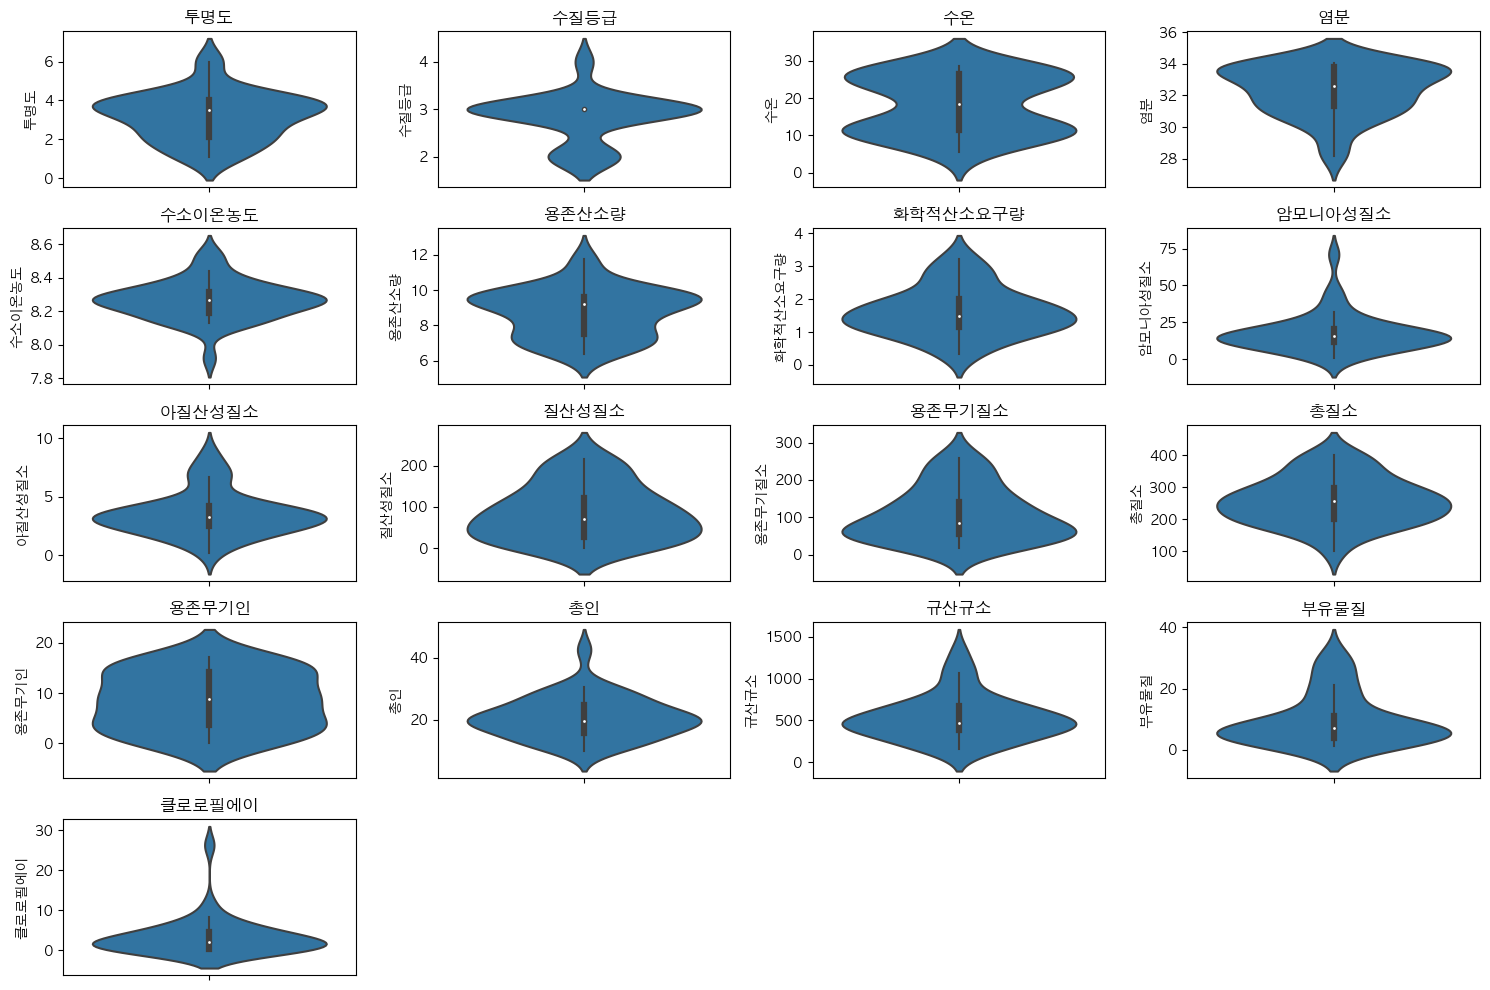

In [328]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=seongsan[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_29754/429291424.p

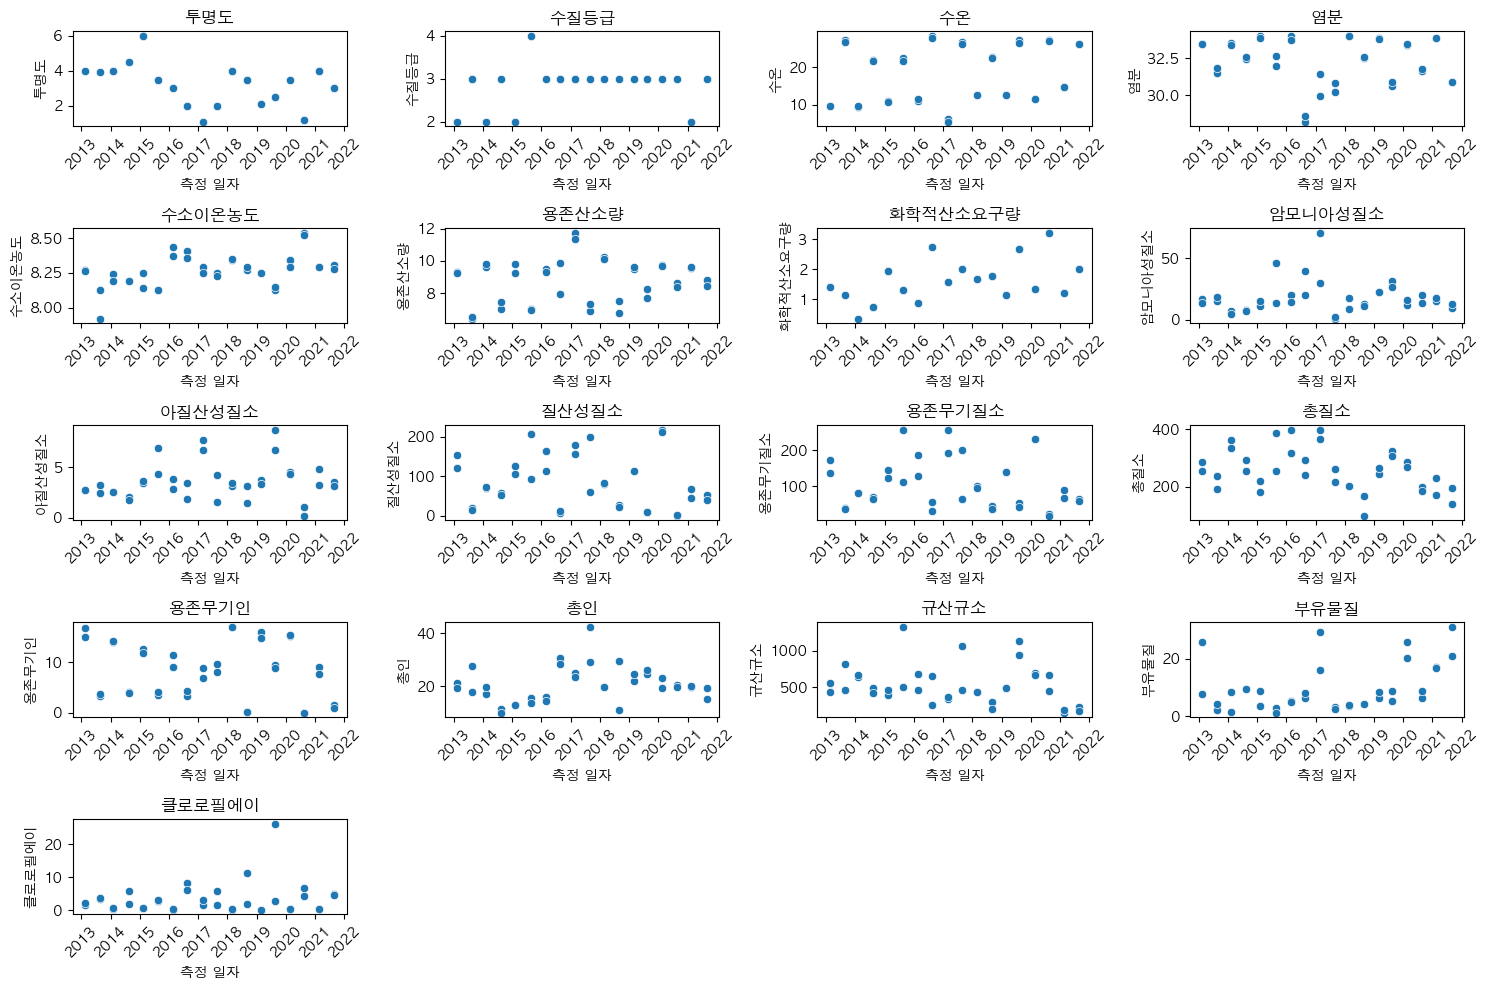

In [329]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=seongsan, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

In [330]:
# plt.figure(figsize=(15, 10))

# for column in columns:
#     plt.plot(seongsan['측정 일자'], seongsan[column], label=column)

# plt.title('측정일별 움직임')
# plt.xlabel('측정 일자')
# plt.ylabel('Values')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

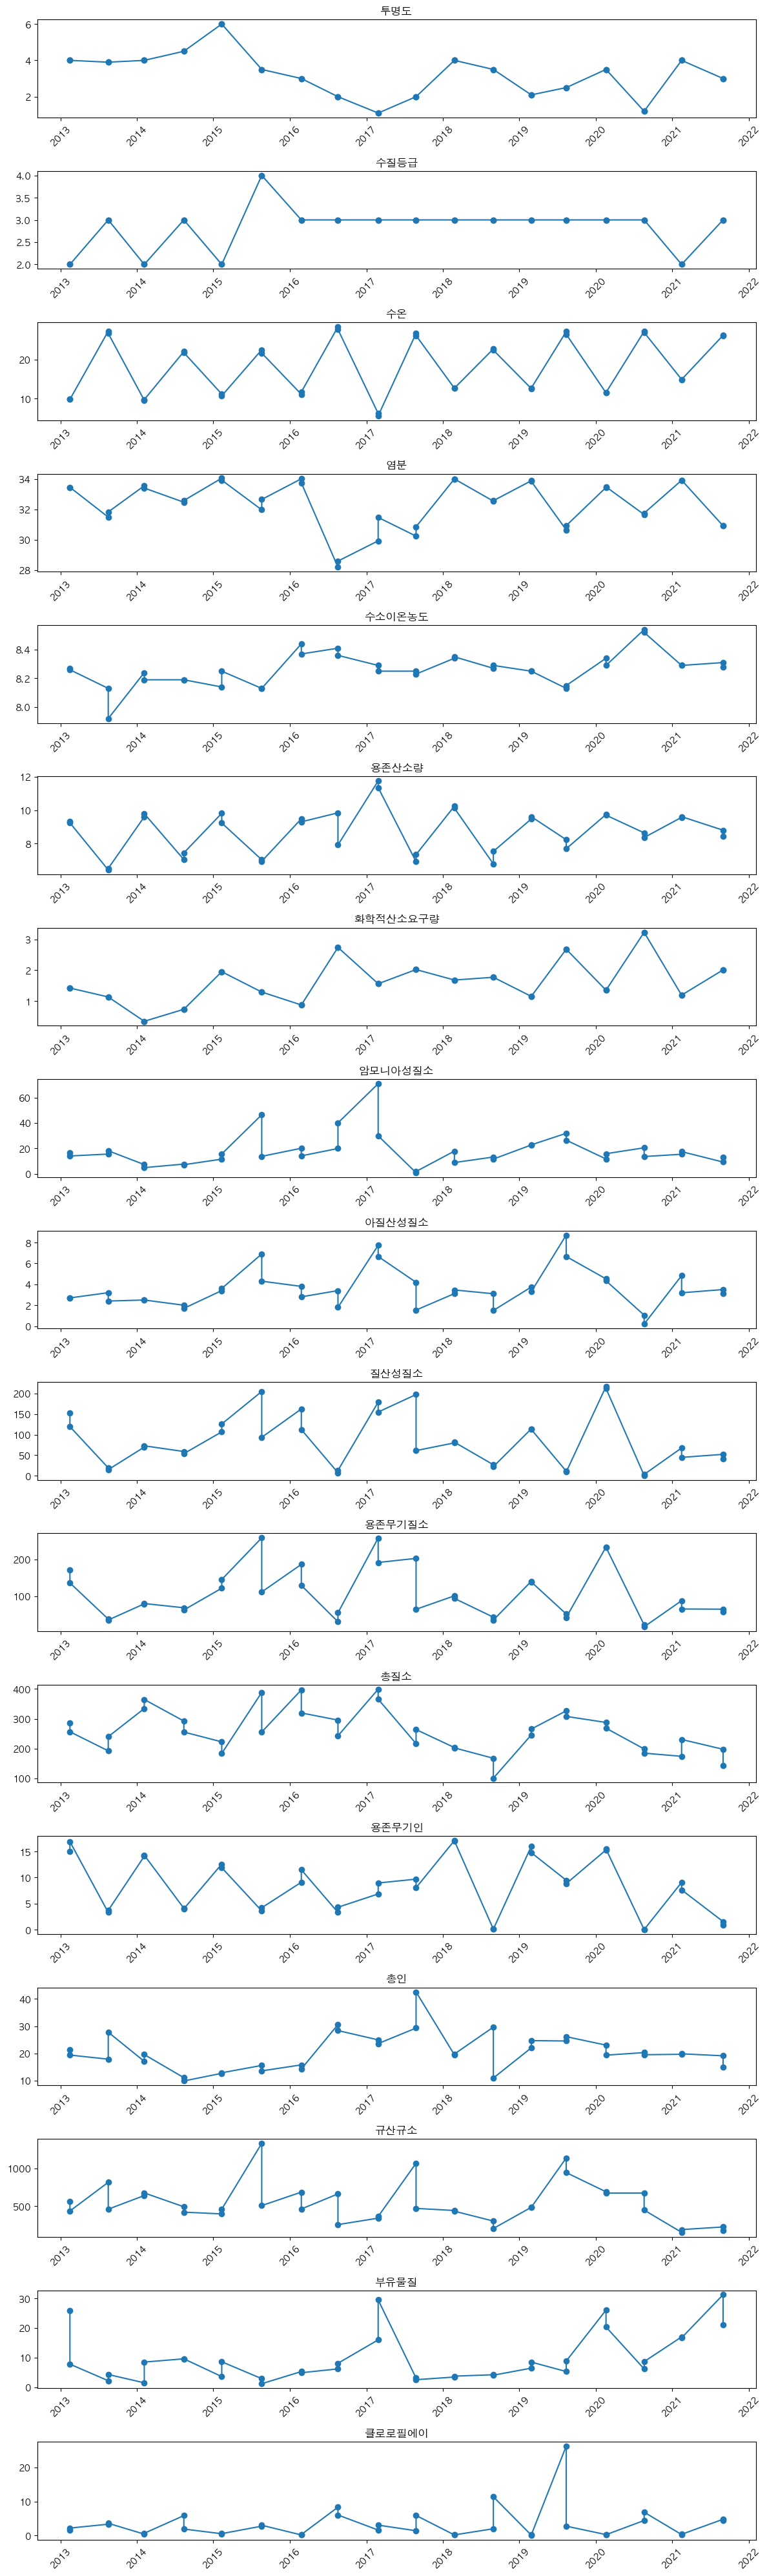

In [331]:
# 각 컬럼에 대해 개별적으로 선형 차트 그리기
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

# 각 컬럼에 대해 반복하여 선형 차트 추가
for i, column in enumerate(columns):
    axes[i].plot(seongsan['측정 일자'], seongsan[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
